<a href="https://colab.research.google.com/github/axelbynne/VISIONARTIFICIAL/blob/main/Operadores_aritm%C3%A9ticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving 1003.png to 1003.png
Saving 1005.png to 1005.png
Saving 1006.png to 1006.png
Saving 1001.png to 1001.png


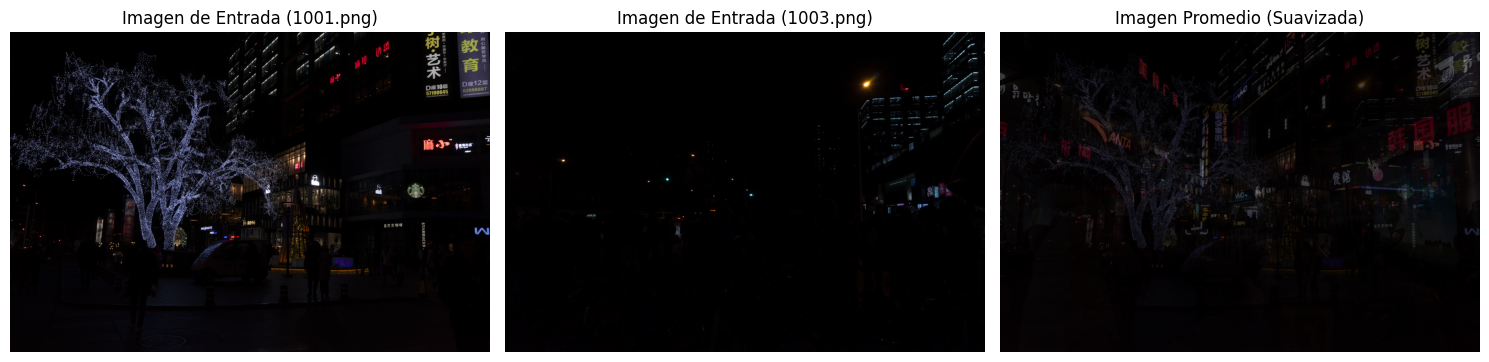

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import img_as_ubyte
import os

# Lista de imágenes reales cargadas
imagenes = ['1001.png', '1003.png', '1005.png', '1006.png']
ruta = "."  # Directorio actual

# Paso 1: Cargar las imágenes reales
noisy_images = []
for nombre in imagenes:
    path = os.path.join(ruta, nombre)
    if not os.path.exists(path):
        raise FileNotFoundError(f"No se encontró la imagen: {path}")
    imagen = img_as_ubyte(imread(path))
    noisy_images.append(imagen)

# Paso 2: Sumar las imágenes y calcular el promedio
sum_image = np.zeros_like(noisy_images[0], dtype=np.float32)
for img in noisy_images:
    sum_image += img

average_image = np.clip(sum_image / len(noisy_images), 0, 255).astype(np.uint8)

# Paso 3: Mostrar resultados
plt.figure(figsize=(15, 5))

# Mostrar la primera imagen como ejemplo
plt.subplot(1, 3, 1)
plt.title(f"Imagen de Entrada ({imagenes[0]})")
plt.imshow(noisy_images[0], cmap='gray')
plt.axis("off")

# Mostrar una segunda imagen como comparación
plt.subplot(1, 3, 2)
plt.title(f"Imagen de Entrada ({imagenes[1]})")
plt.imshow(noisy_images[1], cmap='gray')
plt.axis("off")

# Mostrar la imagen promedio resultante
plt.subplot(1, 3, 3)
plt.title("Imagen Promedio (Suavizada)")
plt.imshow(average_image, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()



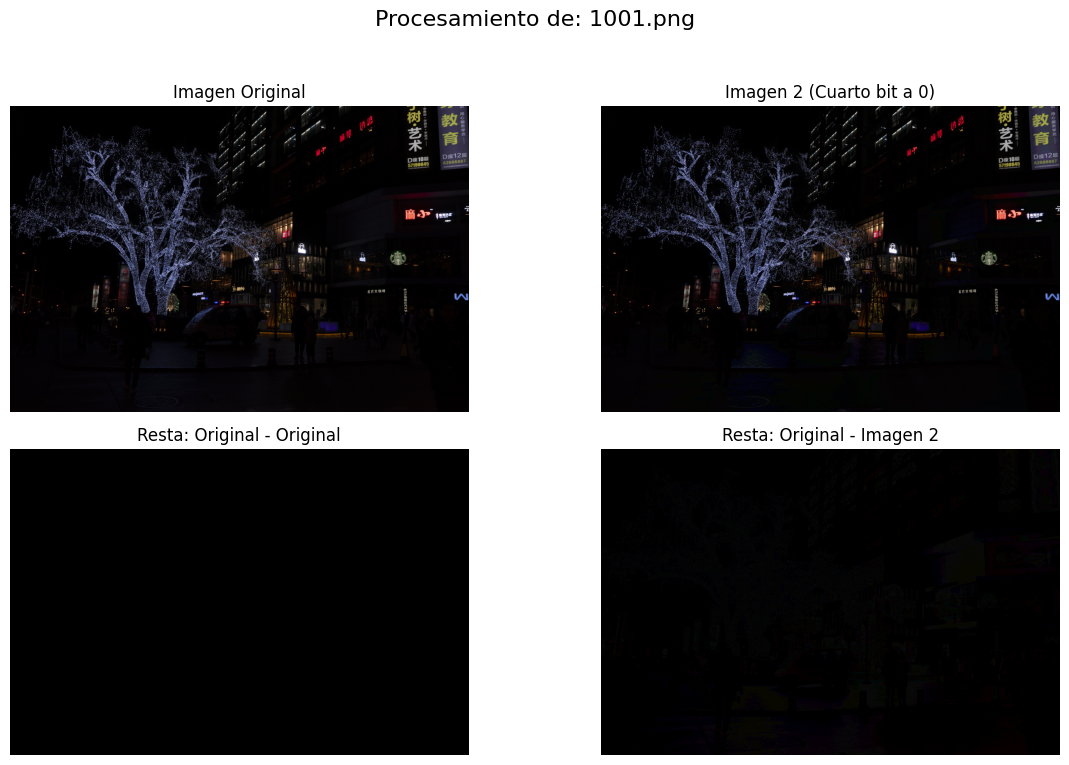

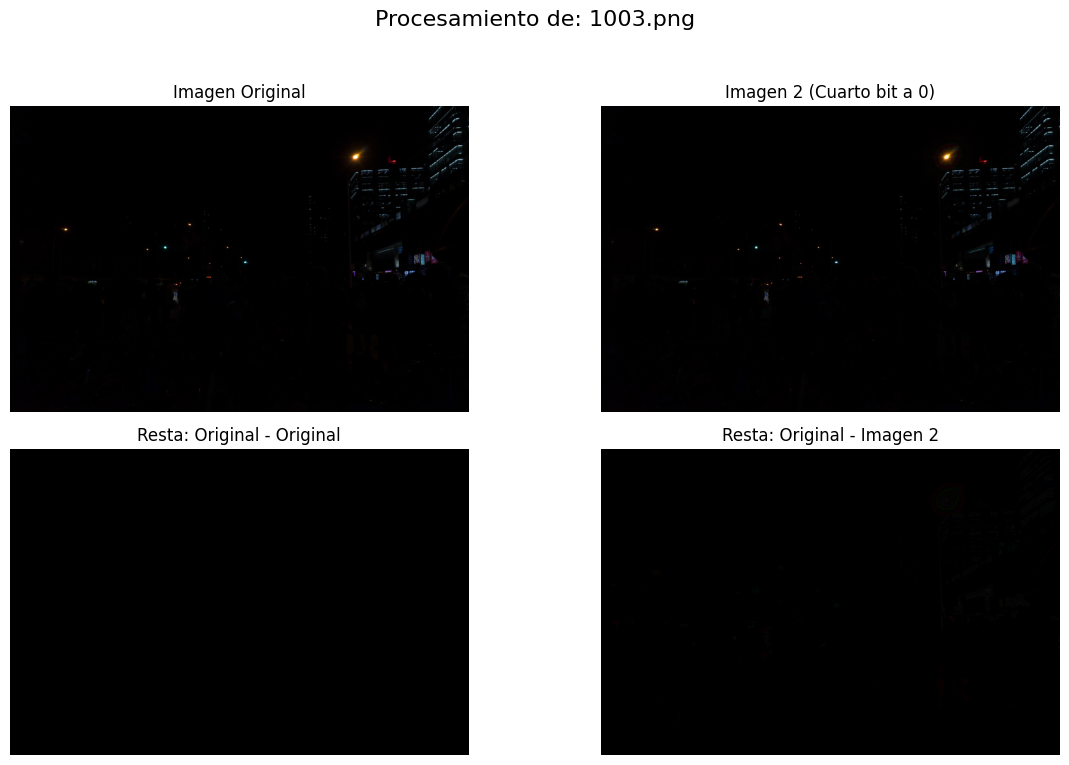

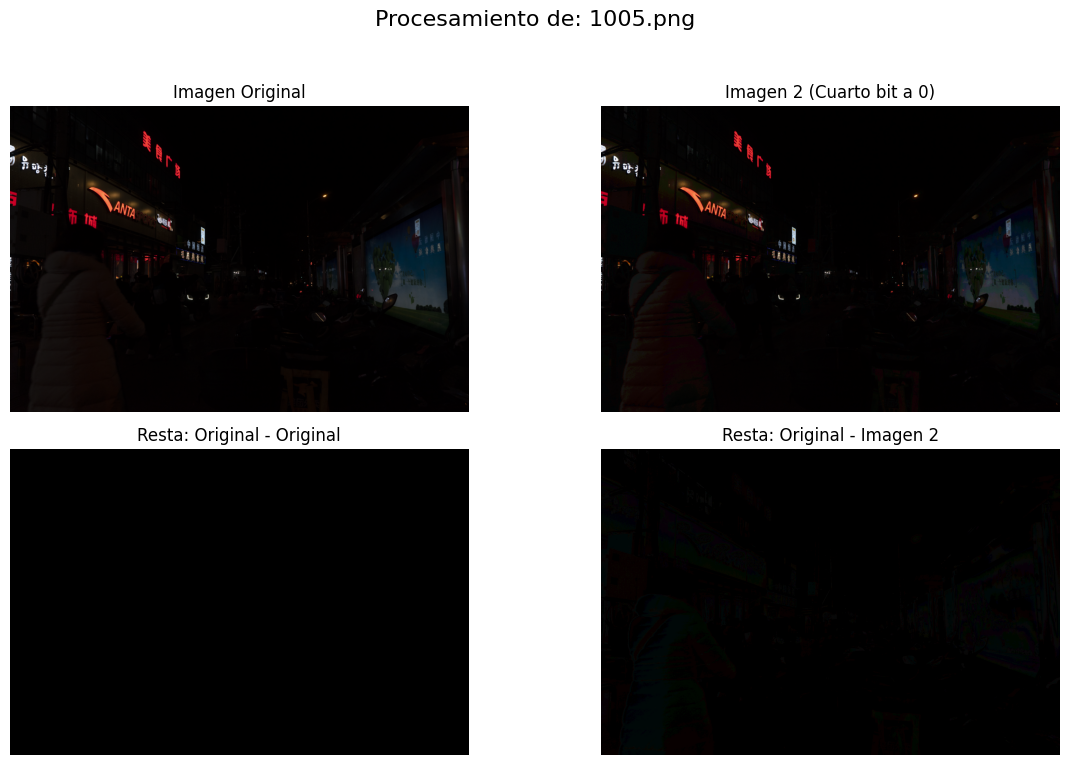

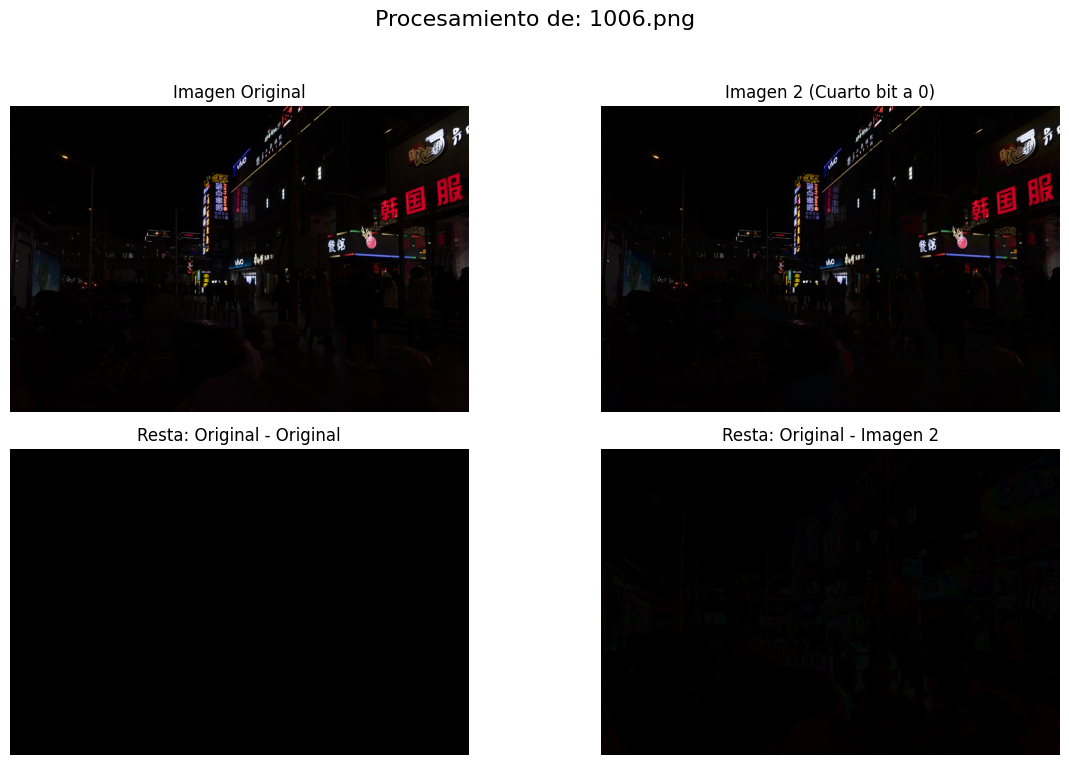

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import img_as_ubyte
import os

# Lista de imágenes
imagenes = ['1001.png', '1003.png', '1005.png', '1006.png']
ruta = "."  # Directorio actual

# Iterar sobre cada imagen
for nombre_img in imagenes:
    # Cargar imagen
    imagen_base = img_as_ubyte(imread(os.path.join(ruta, nombre_img)))

    # Convertir si no está en uint8
    if imagen_base.dtype != np.uint8:
        imagen_base = img_as_ubyte(imagen_base)

    # Paso 1: Generar la imagen 2 (poner a 0 el cuarto bit)
    imagen_2 = imagen_base & 0xF7  # Máscara: 11110111

    # Paso 2: Resta original - original
    imagen_resta = imagen_base - imagen_base

    # Paso 3: Resta original - imagen_2
    imagen_resta_procesada = imagen_base - imagen_2

    # Paso 4: Graficar resultados
    plt.figure(figsize=(12, 8))
    plt.suptitle(f"Procesamiento de: {nombre_img}", fontsize=16)

    plt.subplot(2, 2, 1)
    plt.title("Imagen Original")
    plt.imshow(imagen_base, cmap="gray")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.title("Imagen 2 (Cuarto bit a 0)")
    plt.imshow(imagen_2, cmap="gray")
    plt.axis("off")

    plt.subplot(2, 2, 3)
    plt.title("Resta: Original - Original")
    plt.imshow(imagen_resta, cmap="gray")
    plt.axis("off")

    plt.subplot(2, 2, 4)
    plt.title("Resta: Original - Imagen 2")
    plt.imshow(imagen_resta_procesada, cmap="gray")
    plt.axis("off")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


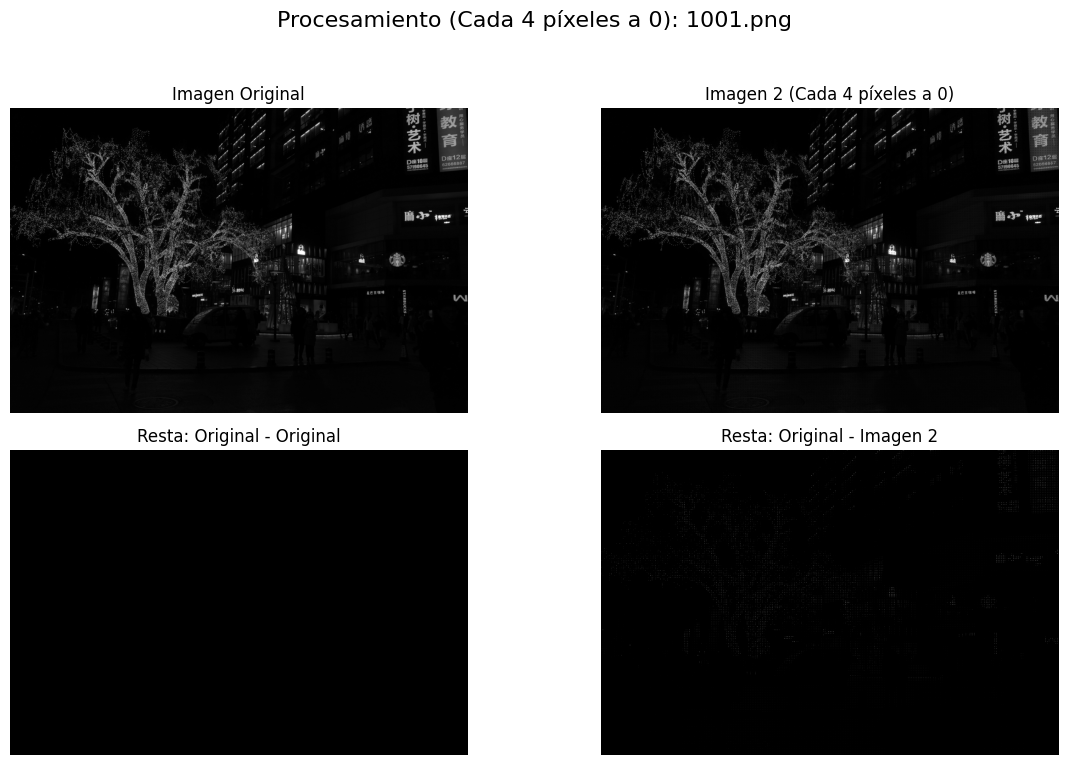

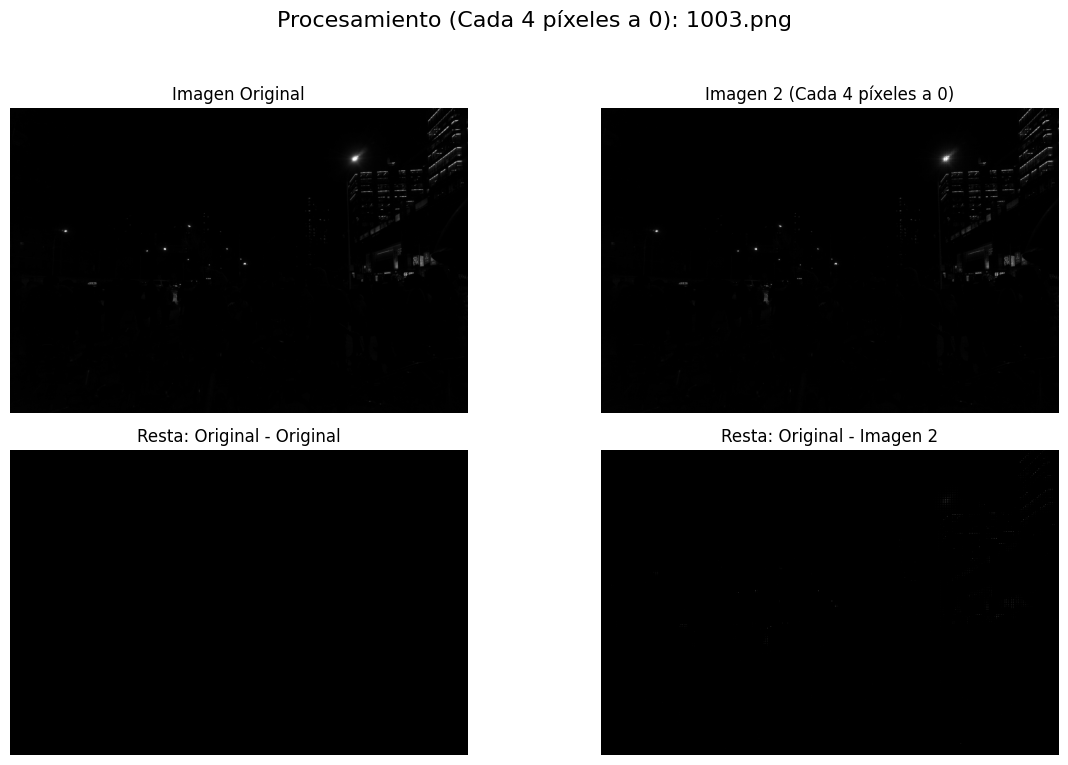

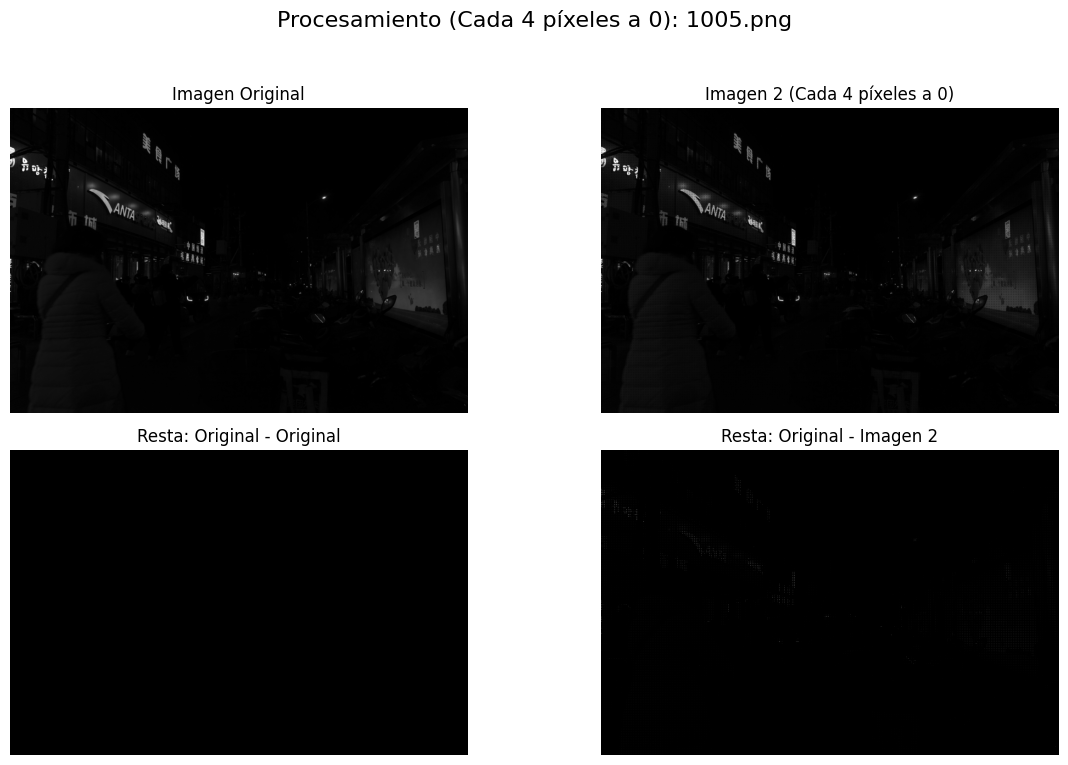

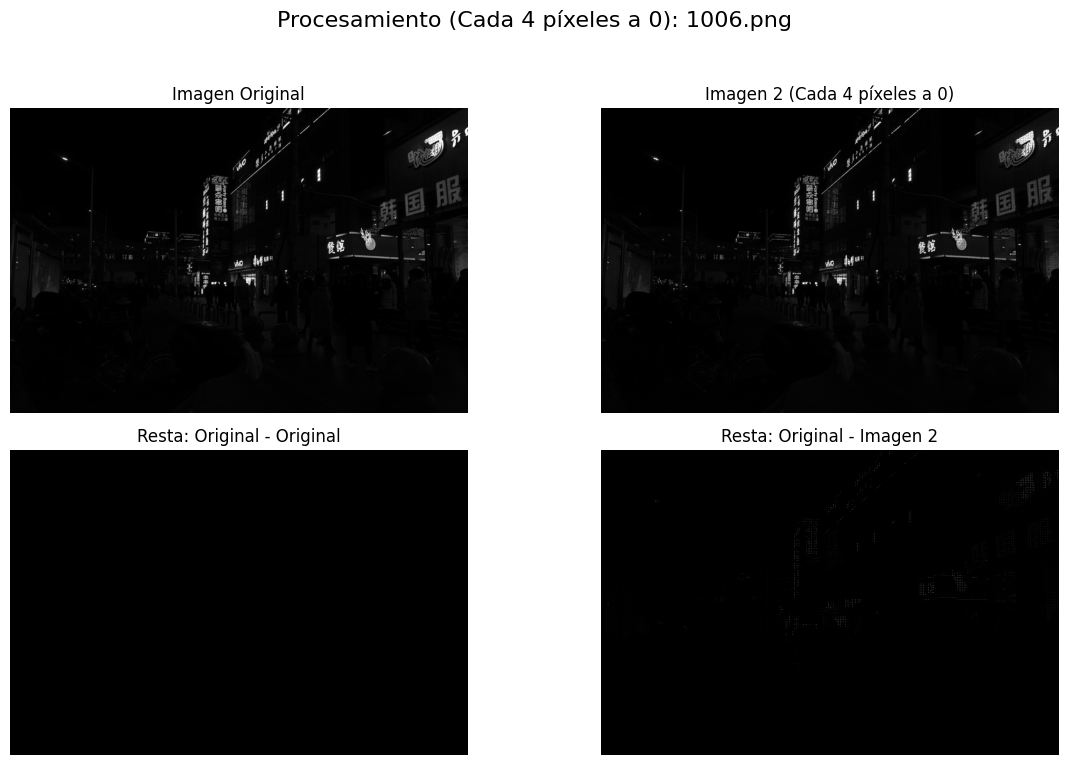

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import img_as_ubyte
import os

# Lista de imágenes
imagenes = ['1001.png', '1003.png', '1005.png', '1006.png']
ruta = "."  # Directorio actual

# Iterar sobre cada imagen
for nombre_img in imagenes:
    # Paso 1: Cargar imagen
    imagen_base = imread(os.path.join(ruta, nombre_img))

    # Convertir a escala de grises si la imagen tiene 3 canales (RGB)
    if len(imagen_base.shape) == 3:
        imagen_base = np.dot(imagen_base[..., :3], [0.2989, 0.587, 0.114])  # Conversión a escala de grises

    # Verificar si los valores de la imagen están en el rango [0, 1]
    if np.max(imagen_base) > 1:
        imagen_base = imagen_base / 255.0  # Normalizar al rango [0, 1]

    # Convertir a uint8
    imagen_base = img_as_ubyte(imagen_base)

    # Paso 2: Generar la imagen 2 (poner a 0 cada 4 píxeles)
    imagen_2 = imagen_base.copy()
    rows, cols = imagen_2.shape

    for i in range(0, rows, 4):
        for j in range(0, cols, 4):
            imagen_2[i, j] = 0

    # Paso 3: Resta original - original
    imagen_resta = imagen_base - imagen_base

    # Paso 4: Resta original - imagen 2
    imagen_resta_procesada = imagen_base - imagen_2

    # Paso 5: Graficar resultados
    plt.figure(figsize=(12, 8))
    plt.suptitle(f"Procesamiento (Cada 4 píxeles a 0): {nombre_img}", fontsize=16)

    plt.subplot(2, 2, 1)
    plt.title("Imagen Original")
    plt.imshow(imagen_base, cmap="gray")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.title("Imagen 2 (Cada 4 píxeles a 0)")
    plt.imshow(imagen_2, cmap="gray")
    plt.axis("off")

    plt.subplot(2, 2, 3)
    plt.title("Resta: Original - Original")
    plt.imshow(imagen_resta, cmap="gray")
    plt.axis("off")

    plt.subplot(2, 2, 4)
    plt.title("Resta: Original - Imagen 2")
    plt.imshow(imagen_resta_procesada, cmap="gray")
    plt.axis("off")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


